# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Mohamad Adi Taufik Hidayat
- Email: aditaufik20@gmail.com
- Id Dicoding: aditaufik

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib

import warnings
warnings.filterwarnings('ignore') # nonaktif futurewarning
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengimpor library yang akan digunakan untuk analisis data, visualisasi, preprocessing, dan modeling. Seperti pandas untuk manipulasi data, seaborn dan matplotlib untuk visualisasi, sklearn untuk machine learning, dan imblearn untuk penyeimbangan data.

### Menyiapkan data yang akan diguankan

## Data Understanding

In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/Dicoding/BPDS/Submission 2/data.csv', sep=';')
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Load dataset utama dari file data.csv menggunakan delimiter ;

In [ ]:
df.shape

(4424, 37)

Melihat dimensi DataFrame df memiliki 4.424 baris dan 37 kolom/feature

In [ ]:
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Menghitung jumlah nilai yang hilang (NaN) di setiap kolom. Tidak ada nilai yang hilang sehingga tidak ada data yang perlu diisi atau ditangani karena hilang.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Mencetak gambaran cepat tentang struktur data seperti tipe data setiap kolom, jumlah nilai non-null, dan penggunaan memori.
- float64 (7 kolom): Kolom-kolom ini menyimpan angka desimal
- int64 (29 kolom): Kolom-kolom ini menyimpan bilangan bulat
- object (1 kolom): Kolom Status adalah tipe object, kolom tersebut berisi string (teks)

In [ ]:
df.duplicated().sum()

np.int64(0)

Mencetak jumlah duplicate, hasilnya tidak ada nilai duplicate daalam dataframe

In [ ]:
for column in df.columns:
  print(f"{column}: Unique values: {df[column].nunique()}")
  print("------------------------------------------------")

Marital_status: Unique values: 6
------------------------------------------------
Application_mode: Unique values: 18
------------------------------------------------
Application_order: Unique values: 8
------------------------------------------------
Course: Unique values: 17
------------------------------------------------
Daytime_evening_attendance: Unique values: 2
------------------------------------------------
Previous_qualification: Unique values: 17
------------------------------------------------
Previous_qualification_grade: Unique values: 101
------------------------------------------------
Nacionality: Unique values: 21
------------------------------------------------
Mothers_qualification: Unique values: 29
------------------------------------------------
Fathers_qualification: Unique values: 34
------------------------------------------------
Mothers_occupation: Unique values: 32
------------------------------------------------
Fathers_occupation: Unique values: 46
-----

mencetak nilai unik dari masing2 kolom

In [ ]:
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


Statistik deskriptif dari kolom-kolom dalam DataFrame. include='all', untuk  menampilkan statistik deskriptif semua kolom, termasuk kolom numerik dan non-numerik.

## Data Preparation / Preprocessing

In [ ]:
# Feature numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
jumlah_numerik = len(numeric_columns)

# Feature kategorikal
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
jumlah_kategorikal = len(categorical_columns)

print(f"Jumlah fitur numerik     : {jumlah_numerik}")
print(f"Jumlah fitur kategorikal : {jumlah_kategorikal}")

Jumlah fitur numerik     : 36
Jumlah fitur kategorikal : 1


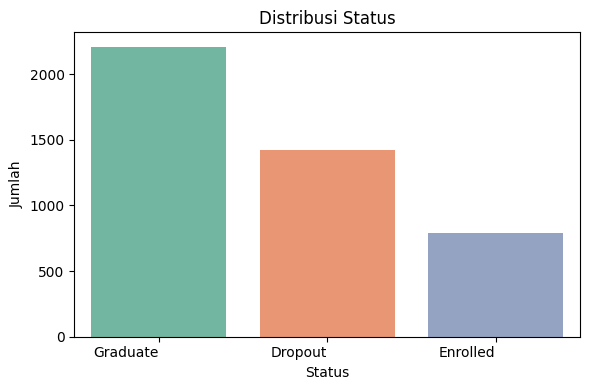

In [ ]:
# Distribusi Feature kategorikal
plt.figure(figsize=(6, 4))
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Jumlah")
    plt.xticks(ha='right')
plt.tight_layout()
plt.show()

Visualisasi bar plot feature Status yang  menunjukkan distribusi 'Dropout', 'Graduate', dan 'Enrolled'.
Distribusi Status tidak seimbang:
- Graduate: 2000+
- Dropout: ~1400
- Enrolled: ~800

Kelas imbalanced — terutama kelas Dropout & Enrolled yang kurang terwakili dibanding Graduate.

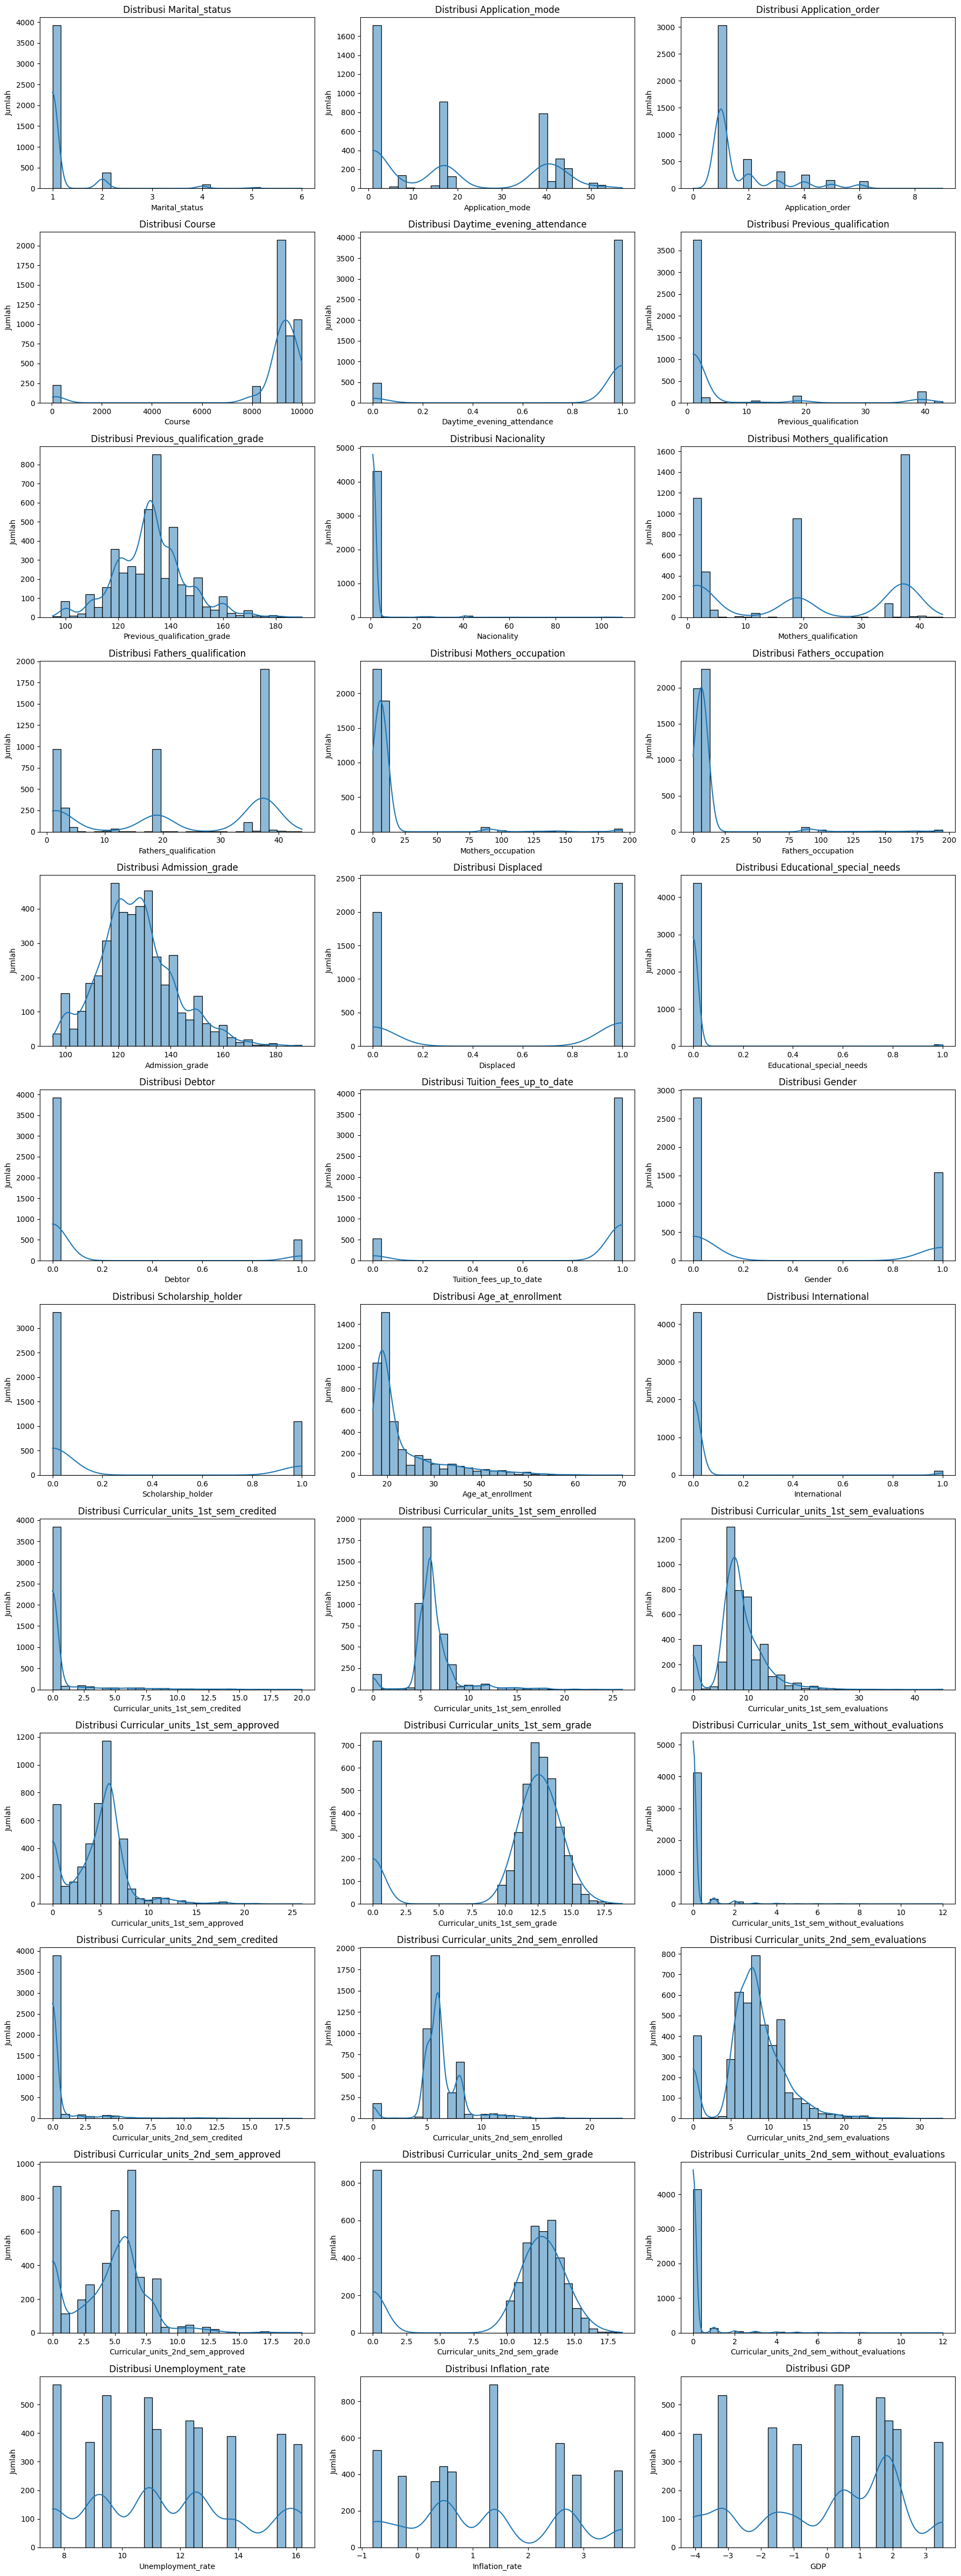

In [ ]:
# Distribusi Feature numerik
# Buat grid 3 kolom
n = len(numeric_columns)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 4))
for i, col in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30, edgecolor="black")
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

- Sebagian besar fitur memiliki distribusi tidak normal (miring kanan/skewed right), dengan banyak nilai kecil dan sedikit nilai besar. Seperti Age_at_enrollment, Curricular_units_1st_sem_enrolled, Curricular_units_2nd_sem_credited, International, Displaced, Debtor
- Beberapa fitur memiliki distribusi multimodal (lebih dari satu puncak)
- Fitur dengan Distribusi Normal/Lebih Stabil seperti Admission_grade, Previous_qualification_grade, Curricular_units_1st_sem_grade, Curricular_units_2nd_sem_grade
- Dataset didominasi fitur dengan sebaran tidak normal.
- Beberapa fitur numerik sebenarnya adalah kategori encoded (misal: Application_mode) yang memiliki pola diskrit.
- Beberapa fitur menunjukkan variabilitas tinggi → penting untuk dilakukan scaling atau transformasi jika digunakan pada model tertentu.
- Distribusi ini cocok untuk model yang robust terhadap skala dan distribusi.


In [ ]:
# Encoding
# 1. Konversi kolom ke kategori
cat_cols = [
    'Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance', 'Previous_qualification',
    'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
    'Displaced', 'Educational_special_needs', 'Debtor',  'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
    'International'
]
df[cat_cols] = df[cat_cols].astype("category")

# Encode label
le = LabelEncoder()
df["Status_encoded"] = le.fit_transform(df["Status"])

# Dataset untuk XGBoost
df_xgb = df.copy()
for col in cat_cols:
    df_xgb[col] = df_xgb[col].cat.codes
X_xgb = df_xgb.drop(columns=["Status", "Status_encoded"])
y_xgb = df_xgb["Status_encoded"]

# Dataset untuk Random Forest
df_rf = pd.get_dummies(df, columns=cat_cols)
X_rf = df_rf.drop(columns=["Status", "Status_encoded"])
y_rf = df_rf["Status_encoded"]

X_xgb.shape, X_rf.shape

((4424, 36), (4424, 255))

- Mengubah tipe data kolom-kolom kategorikal ke category agar bisa diproses oleh metode encoding berikutnya dan dikenali sebagai data kategorikal saat modeling
- Mengubah kolom Status (Graduate, Dropout, Enrolled) menjadi angka 0/1/2 untuk keperluan modeling machine learning dan disimpan dalam kolom Status_encoded
- X_xgb dengan Label Encoding untuk XGBoost, semua kolom kategorikal diubah ke integer melalui .cat.codes. X_xgb berisi 36 kolom total (semua fitur)
- X_rf dengan One-Hot Encoding untuk Random Forest (menghindari urutan antar kategori), sehingga pd.get_dummies() digunakan untuk mengubah setiap kategori menjadi kolom biner, X_rf: fitur hasil one-hot encoding, y_rf: target. X_rf memiliki 255 kolom (karena ekspansi one-hot dari fitur kategorikal)

## Modeling

In [ ]:
# Split data
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)
Xxgb_train, Xxgb_test, yxgb_train, yxgb_test = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)
print("Ukuran train RF:", Xrf_train.shape)
print("Ukuran test RF:", Xrf_test.shape)
print("Ukuran train RF:", Xxgb_train.shape)
print("Ukuran test RF:", Xxgb_test.shape)

Ukuran train RF: (3539, 255)
Ukuran test RF: (885, 255)
Ukuran train RF: (3539, 36)
Ukuran test RF: (885, 36)


Membagi data menjadi:
- 80% data latih (train) untuk melatih model
- 20% data uji (test) untuk mengukur kinerja model di data baru
- Random Forest: 255 fitur
- XGBoost: 36 fitur

In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(Xrf_train, yrf_train)
yrf_pred = rf_model.predict(Xrf_test)

Model Random Forest dengan hyperparameter n_estimators=100 yang menentukan jumlah decision tree (estimator) yang akan dibangun dalam hutan (forest). Dalam kasus ini, model akan membuat 100 decision tree. random_state=42 memastikan hasil yang konsisten setiap kali model dijalankan.

In [ ]:
# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(Xxgb_train, yxgb_train)
yxgb_pred = xgb_model.predict(Xxgb_test)

Model XGBoost model diinisialisasi dengan konfigurasi use_label_encoder=False (untuk menghindari warning terkait encoding label) dan eval_metric='mlogloss' sebagai metrik evaluasi pelatihan, dengan random_state=42 untuk reproduktibilitas.

## Evaluation

In [ ]:
# Evaluasi Model Model XGBoost
def evaluate_model(xgb_model, Xxgb_test, yxgb_test):
    yxgb_pred = xgb_model.predict(Xxgb_test)

    acc = accuracy_score(yxgb_test, yxgb_pred)
    cm = confusion_matrix(yxgb_test, yxgb_pred)
    report = classification_report(yxgb_test, yxgb_pred)

    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", report)
    print("Accuracy Score:", round(acc, 4))

evaluate_model(xgb_model, Xxgb_test, yxgb_test)

Confusion Matrix:
 [[236  35  45]
 [ 32  65  54]
 [ 13  25 380]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79       316
           1       0.52      0.43      0.47       151
           2       0.79      0.91      0.85       418

    accuracy                           0.77       885
   macro avg       0.72      0.70      0.70       885
weighted avg       0.76      0.77      0.76       885

Accuracy Score: 0.7695


- Dropout (0): Precision 0.84, Recall 0.75 → cukup baik
- Enrolled (1): Recall hanya 0.43 → banyak salah klasifikasi
- Graduate (2): Performa sangat baik (Recall 0.91, F1-score 0.85)
- Model mampu mengenali kelas Graduate dengan baik
- Akurasi total: 0.7695

In [ ]:
# Evaluasi Random Forest
def evaluate_model(rf_model, Xrf_test, yrf_test):
    yrf_pred = rf_model.predict(Xrf_test)

    acc = accuracy_score(yrf_test, yrf_pred)
    cm = confusion_matrix(yrf_test, yrf_pred)
    report = classification_report(yrf_test, yrf_pred)

    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", report)
    print("Accuracy Score:", round(acc, 4))

evaluate_model(rf_model, Xrf_test, yrf_test)

Confusion Matrix:
 [[238  20  58]
 [ 38  43  70]
 [ 10  10 398]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79       316
           1       0.59      0.28      0.38       151
           2       0.76      0.95      0.84       418

    accuracy                           0.77       885
   macro avg       0.73      0.66      0.67       885
weighted avg       0.76      0.77      0.75       885

Accuracy Score: 0.7672


- Dropout (0): Stabil (Precision 0.83)
- Enrolled (1): Recall rendah (0.28)
- Graduate (2): Recall sangat tinggi (0.95)
- Model cenderung mengklasifikasikan ke Graduate → terlihat dari baris actual Dropout/Enrolled yang banyak diprediksi sebagai Graduate
- Akurasi total: 0.7672

**Oversampling dengan SMOTE**

In [ ]:
# Split data sebelum SMOTE agar tidak terjadi data leakage
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42, stratify=y_rf)

# Terapkan SMOTE hanya ke data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

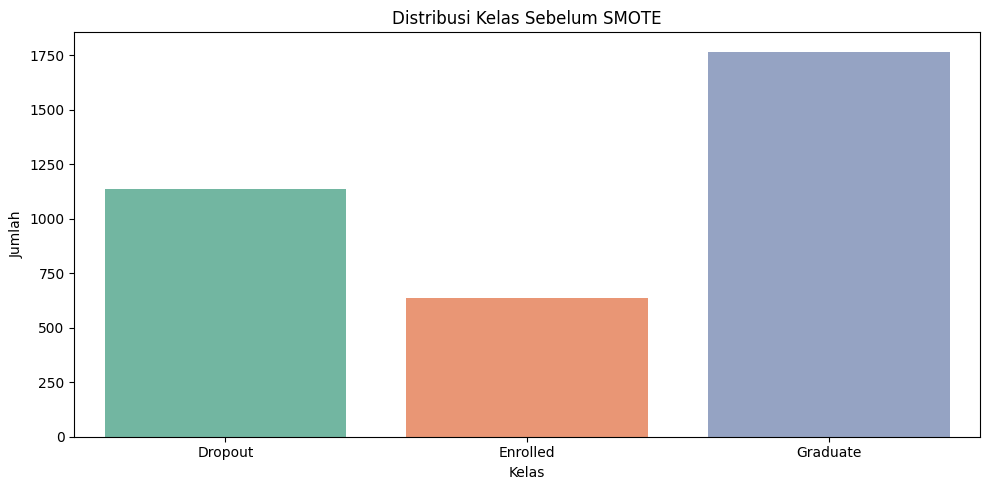

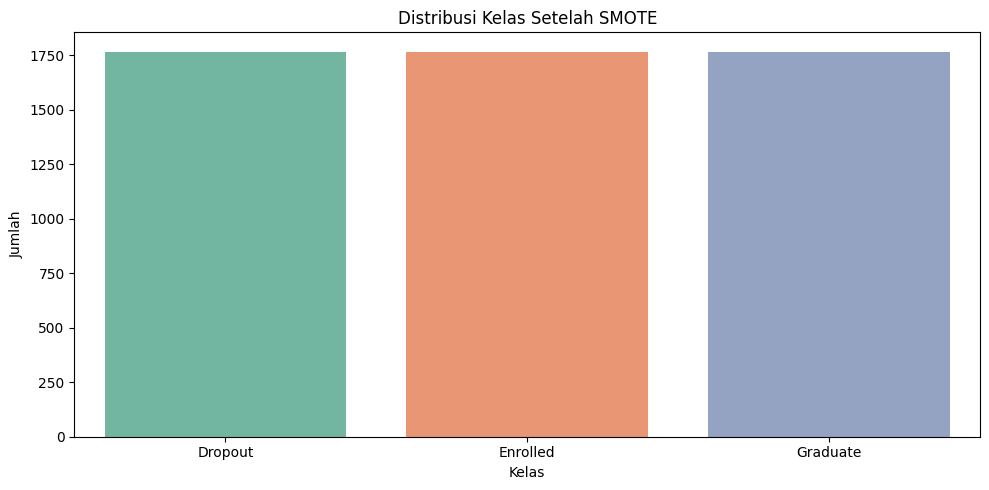

In [ ]:
# Ambil label asli dari encoder
label_names = le.classes_

# Sebelum SMOTE
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, palette='Set2')
plt.title("Distribusi Kelas Sebelum SMOTE")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.xticks(ticks=[0, 1, 2], labels=label_names)
plt.tight_layout()
plt.show()

# Setelah SMOTE
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train_resampled, palette='Set2')
plt.title("Distribusi Kelas Setelah SMOTE")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.xticks(ticks=[0, 1, 2], labels=label_names)
plt.tight_layout()
plt.show()

- SMOTE (Synthetic Minority Over-sampling Technique) metode untuk mengatasi ketidakseimbangan kelas (class imbalance) dengan cara menambahkan data sintetis untuk kelas minoritas (Enrolled dan Dropout)
- SMOTE hanya diterapkan pada X_train, y_train, bukan data test agar evaluasi model tetap valid (tidak kena data leakage).

In [ ]:
# Tuning Hyperparameter Random Forest
# Grid parameter
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

# Random Forest + GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Model terbaik
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 216 candidates, totalling 648 fits


Mengoptimalkan kinerja model Random Forest dengan hyperparameter tuning secara sistematis. Menggunakan GridSearchCV untuk menguji 216 kombinasi hyperparameter yang berbeda (seperti n_estimators, max_depth, max_features, dll.) yang didefinisikan dalam param_grid. Setiap kombinasi dievaluasi menggunakan validasi silang 3-fold pada data pelatihan yang sudah di-resample (X_train_resampled, y_train_resampled), dengan memanfaatkan semua core CPU yang tersedia (n_jobs=-1). Hasil akhirnya adalah model Random Forest terbaik (best_rf) yang telah dilatih dengan konfigurasi hyperparameter optimal yang ditemukan selama 648 total proses fitting.

In [ ]:
# Evaluasi Tuning Hyperparameter Random Forest
y_pred = best_rf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("Accuracy Score:", round(accuracy_score(y_test, y_pred), 4))


Classification Report:
              precision    recall  f1-score   support

     Dropout       0.80      0.72      0.76       284
    Enrolled       0.49      0.43      0.46       159
    Graduate       0.80      0.89      0.85       442

    accuracy                           0.75       885
   macro avg       0.70      0.68      0.69       885
weighted avg       0.75      0.75      0.75       885

Accuracy Score: 0.7537


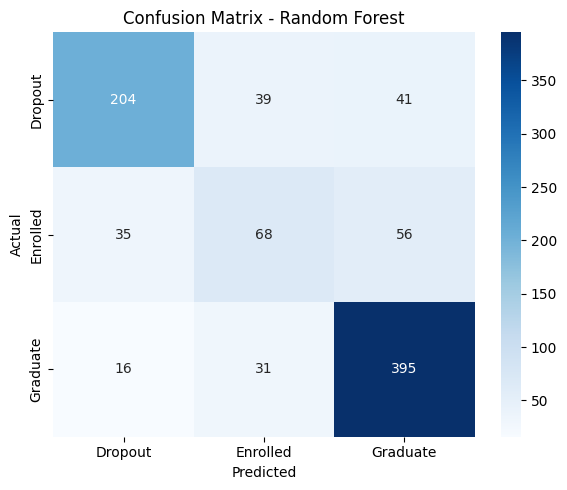

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

- Model lebih seimbang dibanding sebelumnya
- Dropout: precision dan recall 0.80 dan 0.72
- Enrolled: Recall meningkat jadi 0.43 (vs 0.28 sebelumnya)
- Graduate: Recall masih tinggi (0.89)
- Hasil tuning (misalnya lewat max_depth, n_estimators, dsb) membantu model tidak terlalu overfit pada kelas mayoritas
- Meskipun akurasi turun sedikit ke 0.7537, namun macro avg F1-score meningkat dari 0.67 → 0.69

Kesimpulan:
- XGBoost dan Random Forest Tuned unggul dalam recall untuk kelas minoritas (Enrolled)
- Random Forest Tuned lebih seimbang dan terhindar dari bias ke kelas Graduate
- Model terbaik dipilih dari distribusi performa tiap kelas, terutama dalam konteks class imbalance

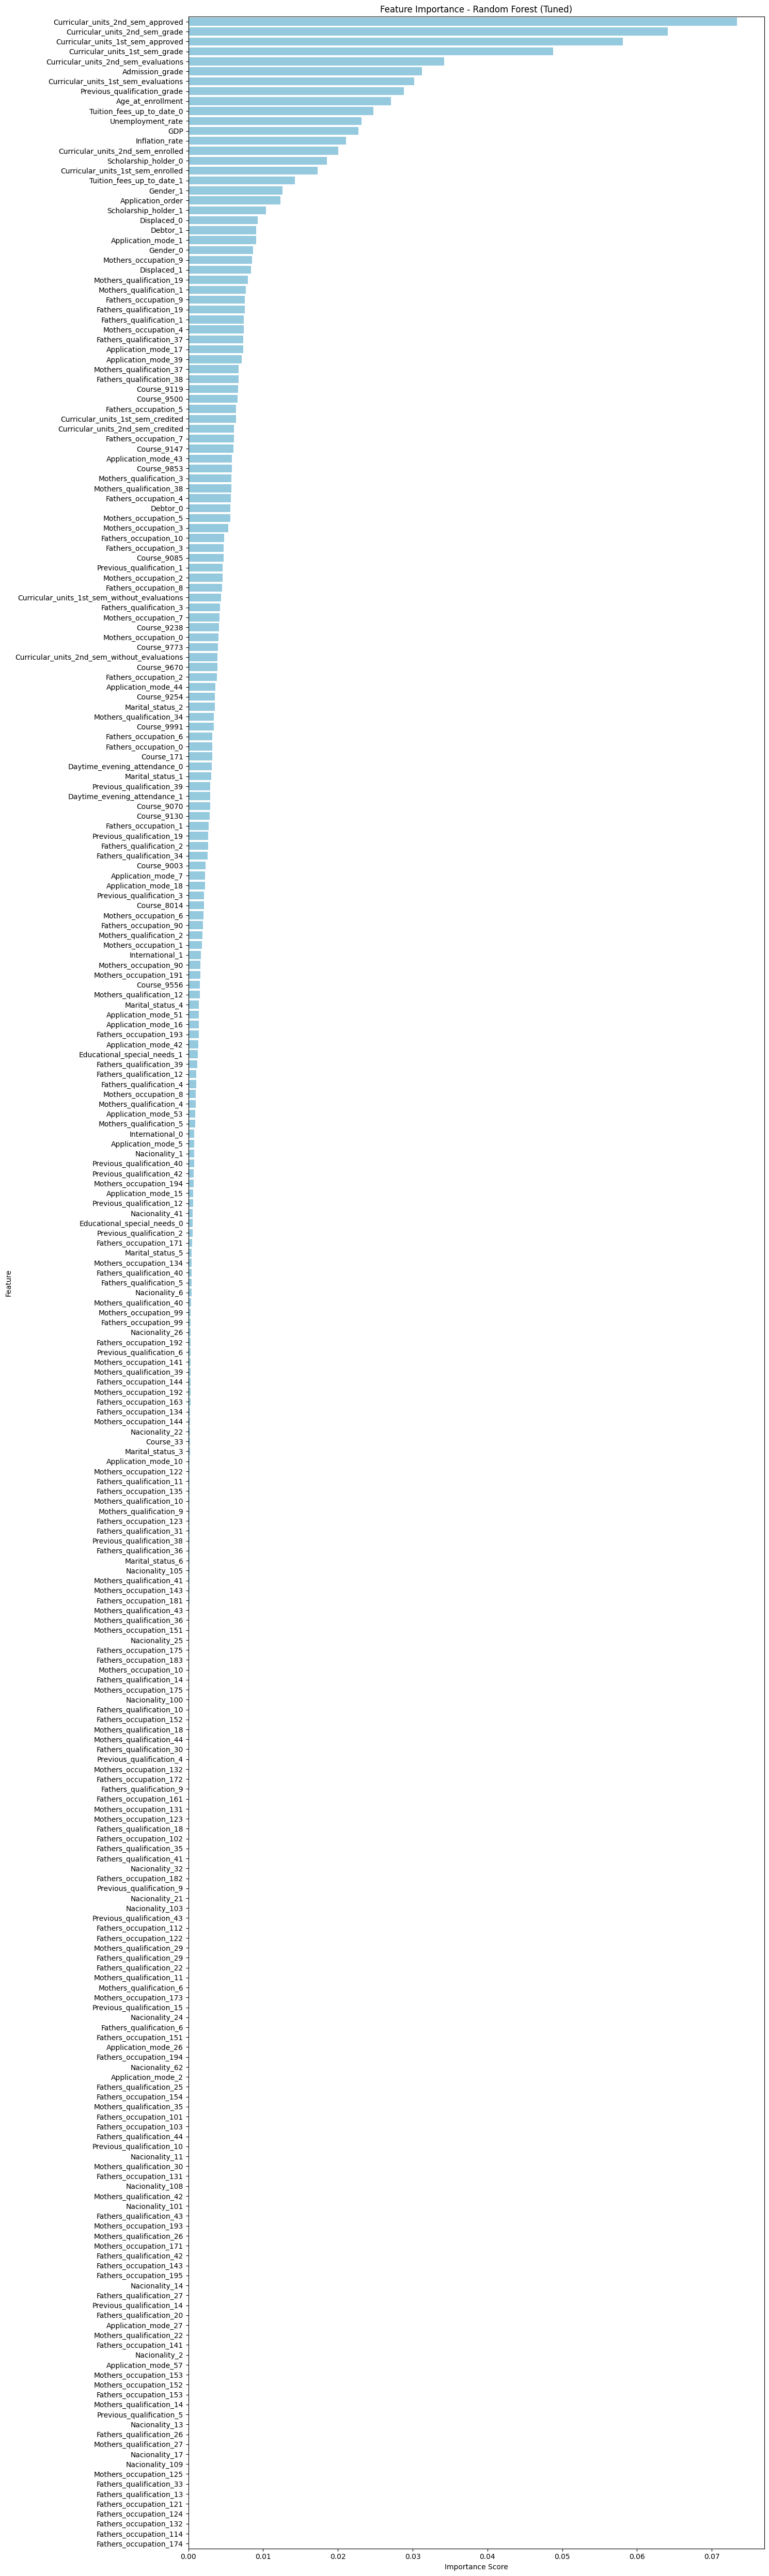

In [ ]:
# Urutan fitur paling penting
importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
top_importances = importances.sort_values(ascending=False)

plt.figure(figsize=(15, 50))
sns.barplot(x=top_importances.values, y=top_importances.index, color='skyblue')
plt.title("Feature Importance - Random Forest (Tuned)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Mencetak feature penting dengan best_rf.feature_importances_. Setelah model Random Forest dilatih, atribut ini tersedia dan berisi sebuah array yang menunjukkan skor kepentingan setiap feature. Skor ini merepresentasikan seberapa besar kontribusi setiap feature terhadap akurasi atau pengurangan impurity model.
- Terlihat bahwa beberapa feature teratas, seperti Curricular_units_1st_sem_grade (nilai mata kuliah semester 1) dan Curricular_units_2nd_sem_grade (nilai mata kuliah semester 2), memiliki skor kepentingan yang paling tinggi karena kinerja akademik sebelumnya sering menjadi prediktor kuat untuk status kelulusan atau dropout.
- Fitur Penting Lainnya seperti Age_at_enrollment, Admission_grade, Curricular_units_2nd_sem_approved, Scholarship_holder, Curricular_units_1st_sem_approved, Unemployment_rate, dan GDP juga menunjukkan skor kepentingan yang signifikan. Ini mengindikasikan bahwa faktor demografi, kualifikasi masuk, kemajuan akademik, dukungan finansial, dan kondisi ekonomi makro juga berperan dalam memprediksi status mahasiswa.
- Semakin ke bawah daftar, skor kepentingan feature semakin mendekati nol (misalnya, Educational_special_needs). Ini berarti bahwa feature-feature tersebut memiliki dampak yang sangat kecil atau bahkan dapat diabaikan dalam model.

In [ ]:
# Simpan model
joblib.dump(best_rf, 'model_rf.joblib')

# Simpan label encoder (agar Streamlit bisa decode label)
joblib.dump(le, 'label_encoder.joblib')

['label_encoder.joblib']

Simpan model yang telah dilatih, serta objek label encoder (le), ke dalam file terpisah (model_rf.joblib dan label_encoder.joblib) menggunakan library joblib, sehingga dapat dimuat ulang dan digunakan kembali untuk membuat prediksi atau deployment aplikasi (misalnya di Streamlit) tanpa perlu melatih ulang model atau menyesuaikan encoder dari awal.

In [ ]:
!pip install pipreqs

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.3/798.3 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.5 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=0f774dd30827c5374a795777e619bf6bbab62ab78e5b5186638ea1cd39357630
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.12.3 which is incompatible.


In [ ]:
!pipreqs "/content/drive/MyDrive/Dicoding/BPDS/Submission 2/" --scan-notebooks

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/drive/MyDrive/Dicoding/BPDS/Submission 2/requirements.txt


Membuat file requirement.txt

In [ ]:
!python --version

Python 3.11.13
